In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import yaml
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
#графики в svg выглядят более четкими
import xgboost as xgb
from xgboost import plot_importance, plot_tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from functools import reduce

In [ ]:
train = pd.read_csv('train_dataset_train.csv')
train

,id,age_indicator,month_id,student_id,program_id,carts_created_at,spent_time_total,spent_time_to_complete_hw,completed_hw,failed_hw,reworked_hw,interacted_hw,avg_hw_mark,test_with_good_mark,test_with_great_mark,webinars,avg_quiz_result,notes,hw_leader,lessons,activity,bought_d1,bought_d2,bought_d3,bought_d4,bought_d5,bought_avg_duration,payment_type,promo,price,communication_type,auto_payment,ABC,city,country,gender,speed_recall,os,browser,platform,m_avg_talk_duration,m_avg_duration,m_missed_calls,m_total_calls,m_was_conversations,m_total_duration,p_avg_talk_duration,p_avg_duration,p_missed_calls,p_total_calls,p_was_conversations,p_total_duration,support_feedback_avg,feedback_avg_d1,feedback_avg_d2,feedback_avg_d3,feedback_avg_d4,feedback_avg_d5,target
0,15182,32.0,9/30/2020,6694527,1469,8/26/2020,163.0,0.0,1.0,0.0,17.0,3.0,100.0,12.0,8.0,0.0,NaN,147.0,0.0,14.0,32.0,0,0,0,0,0,NaN,1,+,20042.959300,phone,0,D,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,NaN,NaN,0
1,89385,NaN,6/30/2021,6712877,1392,8/5/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,1,-,15057.315000,order,1,A,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,47931,NaN,2/28/2021,6659444,376,6/20/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,1,+,23389.029300,web,0,D,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,279085,1.0,11/30/2021,7151591,1160,4/14/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,1,-,22260.632220,order,1,B,NaN,NaN,1.0,NaN,Windows,Chrome,pc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,7806,30.0,10/31/2020,6705666,952,7/19/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,1,-,7255.515915,order,1,A,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,179932,27.0,11/30/2021,6816668,1043,10/16/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,1,0,40.0,1,+,10263.967450,order,1,D,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,3.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,0
199996,257734,NaN,9/30/2021,6984939,1635,1/2/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,1,-,35998.565400,order,0,D,NaN,NaN,0.0,NaN,iOS,Mobile Safari,mobile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,0
199997,43549,17.0,3/31/2021,6670084,789,6/29/2020,NaN,NaN,0.0,0.0,0.0,2.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,2.0,0.0,0,0,0,0,0,NaN,1,+,22084.062000,web,0,D,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,4.0,NaN,0
199998,100800,NaN,6/30/2021,6917324,476,12/7/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,1,-,14377.805400,order,1,A,NaN,NaN,0.0,NaN,Android,Samsung Internet,mobile,6.0,6.0,0.0,1.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
test = pd.read_csv('test_dataset_test.csv')
test

,id,age_indicator,month_id,student_id,program_id,carts_created_at,spent_time_total,spent_time_to_complete_hw,completed_hw,failed_hw,reworked_hw,interacted_hw,avg_hw_mark,test_with_good_mark,test_with_great_mark,webinars,avg_quiz_result,notes,hw_leader,lessons,activity,bought_d1,bought_d2,bought_d3,bought_d4,bought_d5,bought_avg_duration,payment_type,promo,price,communication_type,auto_payment,ABC,city,country,gender,speed_recall,os,browser,platform,m_avg_talk_duration,m_avg_duration,m_missed_calls,m_total_calls,m_was_conversations,m_total_duration,p_avg_talk_duration,p_avg_duration,p_missed_calls,p_total_calls,p_was_conversations,p_total_duration,support_feedback_avg,feedback_avg_d1,feedback_avg_d2,feedback_avg_d3,feedback_avg_d4,feedback_avg_d5
0,77551,NaN,5/31/2021,7064806,1395,2/28/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,1,-,22186.15905,order,1,B,NaN,NaN,0.0,NaN,Windows,Chrome,pc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,227812,27.0,5/31/2021,6982061,245,1/1/2021,81.0,0.0,5.0,0.0,13.0,7.0,100.0,4.0,0.0,6.0,NaN,0.0,0.0,24.0,32.0,0,0,0,0,0,NaN,1,-,64862.28000,web,0,D,NaN,NaN,1.0,NaN,Windows,Chrome,pc,50.666667,50.666667,0.0,3.0,3.0,152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,103035,9.0,6/30/2021,7118790,1233,3/19/2021,49.0,0.0,2.0,0.0,0.0,4.0,100.0,0.0,0.0,1.0,NaN,0.0,0.0,12.0,16.0,0,0,0,0,0,NaN,1,+,41637.57431,order,1,D,NaN,NaN,1.0,NaN,iOS,Instagram,mobile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
3,260943,NaN,9/30/2021,7288419,784,6/29/2021,10.0,NaN,0.0,0.0,0.0,3.0,NaN,0.0,0.0,1.0,NaN,0.0,0.0,5.0,2.0,0,0,0,0,0,NaN,1,-,11677.78430,order,0,C,NaN,NaN,0.0,NaN,iOS,Facebook,mobile,153.000000,153.000000,0.0,3.0,3.0,459.0,30.500000,30.500000,0.0,2.0,2.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN
4,134611,7.0,8/31/2021,6949976,998,12/31/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,1,-,7885.99276,order,1,A,NaN,NaN,0.0,NaN,Android,Chrome Mobile,mobile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84992,186427,15.0,10/31/2021,6841719,73,10/19/2021,10.0,NaN,0.0,0.0,0.0,2.0,NaN,0.0,0.0,1.0,97.0,0.0,0.0,2.0,1.0,0,0,0,0,0,NaN,1,+,13523.78538,order,1,A,NaN,NaN,1.0,NaN,Android,Chrome Mobile,mobile,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN
84993,197918,27.0,11/30/2021,6469768,885,11/7/2021,27.0,NaN,0.0,0.0,0.0,2.0,NaN,0.0,0.0,0.0,NaN,1155.0,0.0,5.0,14.0,0,0,0,0,0,NaN,1,-,18772.19981,web,1,B,NaN,NaN,1.0,NaN,Mac OS X,Safari,pc,0.000000,NaN,2.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
84994,174961,37.0,10/31/2021,7328822,1126,7/5/2021,0.0,0.0,1.0,0.0,0.0,3.0,100.0,0.0,0.0,0.0,NaN,0.0,0.0,4.0,1.0,0,0,0,0,0,NaN,1,-,17050.55855,web,0,B,NaN,NaN,0.0,NaN,Mac OS X,Safari,pc,101.000000,101.000000,0.0,1.0,1.0,101.0,37.666667,37.666667,0.0,3.0,3.0,113.0,NaN,NaN,NaN,NaN,NaN,NaN
84995,182226,14.0,11/30/2021,5255473,1495,2/13/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,NaN,1,-,14824.46529,web,0,B,NaN,NaN,0.0,NaN,Mac OS X,Safari,pc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 59 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         200000 non-null  int64  
 1   age_indicator              159123 non-null  float64
 2   month_id                   200000 non-null  object 
 3   student_id                 200000 non-null  int64  
 4   program_id                 200000 non-null  int64  
 5   carts_created_at           200000 non-null  object 
 6   spent_time_total           86309 non-null   float64
 7   spent_time_to_complete_hw  42467 non-null   float64
 8   completed_hw               97599 non-null   float64
 9   failed_hw                  97599 non-null   float64
 10  reworked_hw                97599 non-null   float64
 11  interacted_hw              97599 non-null   float64
 12  avg_hw_mark                44496 non-null   float64
 13  test_with_good_mark        97

Text(0, 0.5, 'Counts')

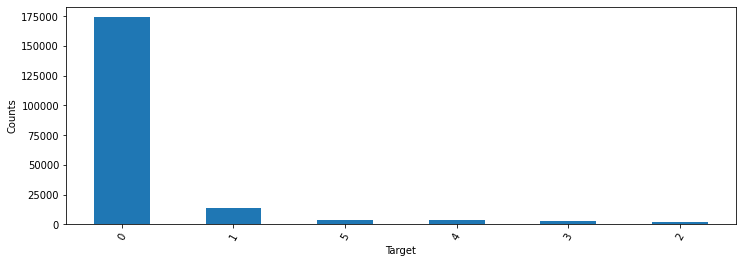

In [ ]:
train['target'].value_counts().plot(kind='bar',figsize=(12,4),fontsize=10)
plt.xticks(rotation=60)
plt.xlabel("Target",fontsize=10)
plt.ylabel("Counts",fontsize=10)

In [ ]:
train['target'].value_counts()

0    174301
1     13512
5      3678
4      3659
3      3027
2      1823
Name: target, dtype: int64

In [ ]:
train.columns

Index(['id', 'age_indicator', 'month_id', 'student_id', 'program_id',
       'carts_created_at', 'spent_time_total', 'spent_time_to_complete_hw',
       'completed_hw', 'failed_hw', 'reworked_hw', 'interacted_hw',
       'avg_hw_mark', 'test_with_good_mark', 'test_with_great_mark',
       'webinars', 'avg_quiz_result', 'notes', 'hw_leader', 'lessons',
       'activity', 'bought_d1', 'bought_d2', 'bought_d3', 'bought_d4',
       'bought_d5', 'bought_avg_duration', 'payment_type', 'promo', 'price',
       'communication_type', 'auto_payment', 'ABC', 'city', 'country',
       'gender', 'speed_recall', 'os', 'browser', 'platform',
       'm_avg_talk_duration', 'm_avg_duration', 'm_missed_calls',
       'm_total_calls', 'm_was_conversations', 'm_total_duration',
       'p_avg_talk_duration', 'p_avg_duration', 'p_missed_calls',
       'p_total_calls', 'p_was_conversations', 'p_total_duration',
       'support_feedback_avg', 'feedback_avg_d1', 'feedback_avg_d2',
       'feedback_avg_d3', 'fee

In [ ]:
# преобразуем время в двух колонках теста и трейна в месяц и год (затем заносим их в категорию)
train['month_id'] = pd.to_datetime(train['month_id'])
test['month_id'] = pd.to_datetime(test['month_id'])
train['carts_created_at'] = pd.to_datetime(train['carts_created_at'])
test['carts_created_at'] = pd.to_datetime(test['carts_created_at'])

train['month_id'] = train['month_id'].dt.strftime('%m %Y')
test['month_id'] = test['month_id'].dt.strftime('%m %Y')
train['carts_created_at'] = train['carts_created_at'].dt.strftime('%m %Y')
test['carts_created_at'] = test['carts_created_at'].dt.strftime('%m %Y')

train['month_id'] = train['month_id'].astype('str')
train['carts_created_at'] = train['carts_created_at'].astype('str')
test['month_id'] = test['month_id'].astype('str')
test['carts_created_at'] = test['carts_created_at'].astype('str')

In [ ]:
column_names_to_train =['student_id', 'program_id','age_indicator','month_id', 'carts_created_at',
        'spent_time_total','completed_hw', 'failed_hw', 'reworked_hw', 'interacted_hw',
       'avg_hw_mark', 'test_with_good_mark', 'test_with_great_mark',
       'webinars', 'avg_quiz_result', 'notes', 'hw_leader', 'lessons',
       'activity',
        'bought_d1', 'bought_d2', 'bought_d3', 'bought_d4','bought_d5', 
        'bought_avg_duration', 'payment_type', 'promo', 'price',
       'communication_type', 'auto_payment', 'ABC', 'city', 'country',
       'gender', 'speed_recall', 'os', 'browser', 'platform',
       'm_avg_talk_duration', 'm_avg_duration', 'm_missed_calls',
       'm_total_calls', 'm_was_conversations', 'm_total_duration',
       'p_avg_talk_duration', 'p_avg_duration', 'p_missed_calls',
       'p_total_calls', 'p_was_conversations', 'p_total_duration',
       'support_feedback_avg', 
       'feedback_avg_d1', 'feedback_avg_d2', 'feedback_avg_d3', 'feedback_avg_d4', 'feedback_avg_d5']

In [ ]:
column_names_to_linear =['spent_time_total','completed_hw','failed_hw','reworked_hw',
                        'interacted_hw','avg_hw_mark','test_with_good_mark','test_with_great_mark','webinars',
                         'avg_quiz_result','notes','hw_leader','lessons','activity','bought_avg_duration','price',
                         'm_avg_talk_duration','m_avg_duration','m_missed_calls','m_total_calls','m_was_conversations','m_total_duration',
                         'p_avg_talk_duration','p_avg_duration','support_feedback_avg',
                         'feedback_avg_d1','feedback_avg_d2','feedback_avg_d3','feedback_avg_d4','feedback_avg_d5']

train_all=train.fillna(0)
test_all=test.fillna(0)

train_all['age_indicator']=train_all['age_indicator'].astype("category").cat.codes
train_all['month_id']=train_all['month_id'].astype("category").cat.codes
train_all['carts_created_at']=train_all['carts_created_at'].astype("category").cat.codes
train_all['program_id']=train_all['program_id'].astype("category").cat.codes

train_all['bought_d1']=train_all['bought_d1'].astype("category").cat.codes
train_all['bought_d2']=train_all['bought_d2'].astype("category").cat.codes
train_all['bought_d3']=train_all['bought_d3'].astype("category").cat.codes
train_all['bought_d4']=train_all['bought_d4'].astype("category").cat.codes
train_all['bought_d5']=train_all['bought_d5'].astype("category").cat.codes
train_all['payment_type']=train_all['payment_type'].astype("category").cat.codes
train_all['promo']=train_all['promo'].astype("category").cat.codes
train_all['price']=train_all['price'].astype("category").cat.codes
train_all['communication_type']=train_all['communication_type'].astype("category").cat.codes
train_all['auto_payment']=train_all['auto_payment'].astype("category").cat.codes
train_all['ABC']=train_all['ABC'].astype("category").cat.codes
train_all['city']=train_all['city'].astype("category").cat.codes
train_all['country']=train_all['country'].astype("category").cat.codes
train_all['gender']=train_all['gender'].astype("category").cat.codes
train_all['speed_recall']=train_all['speed_recall'].astype("category").cat.codes
train_all['os']=train_all['os'].astype("category").cat.codes
train_all['browser']=train_all['browser'].astype("category").cat.codes
train_all['platform']=train_all['platform'].astype("category").cat.codes
train_all['p_missed_calls']=train_all['p_missed_calls'].astype("category").cat.codes
train_all['p_total_calls']=train_all['p_total_calls'].astype("category").cat.codes
train_all['p_was_conversations']=train_all['p_was_conversations'].astype("category").cat.codes

test_all['age_indicator']=test_all['age_indicator'].astype("category").cat.codes
test_all['program_id']=test_all['program_id'].astype("category").cat.codes


test_all['month_id']=test_all['month_id'].astype("category").cat.codes
test_all['carts_created_at']=test_all['carts_created_at'].astype("category").cat.codes

test_all['bought_d1']=test_all['bought_d1'].astype("category").cat.codes
test_all['bought_d2']=test_all['bought_d2'].astype("category").cat.codes
test_all['bought_d3']=test_all['bought_d3'].astype("category").cat.codes
test_all['bought_d4']=test_all['bought_d4'].astype("category").cat.codes
test_all['bought_d5']=test_all['bought_d5'].astype("category").cat.codes
test_all['payment_type']=test_all['payment_type'].astype("category").cat.codes
test_all['promo']=test_all['promo'].astype("category").cat.codes
test_all['price']=test_all['price'].astype("category").cat.codes
test_all['communication_type']=test_all['communication_type'].astype("category").cat.codes
test_all['auto_payment']=test_all['auto_payment'].astype("category").cat.codes
test_all['ABC']=test_all['ABC'].astype("category").cat.codes
test_all['city']=test_all['city'].astype("category").cat.codes
test_all['country']=test_all['country'].astype("category").cat.codes
test_all['gender']=test_all['gender'].astype("category").cat.codes
test_all['speed_recall']=test_all['speed_recall'].astype("category").cat.codes
test_all['os']=test_all['os'].astype("category").cat.codes
test_all['browser']=test_all['browser'].astype("category").cat.codes
test_all['platform']=test_all['platform'].astype("category").cat.codes
test_all['p_missed_calls']=test_all['p_missed_calls'].astype("category").cat.codes
test_all['p_total_calls']=test_all['p_total_calls'].astype("category").cat.codes
test_all['p_was_conversations']=test_all['p_was_conversations'].astype("category").cat.codes

train_all[column_names_to_linear]=np.log(1+train_all[column_names_to_linear])
test_all[column_names_to_linear]=np.log(1+test_all[column_names_to_linear])





In [ ]:
train_all[column_names_to_linear]=train_all[column_names_to_linear].astype('float')

In [ ]:
train_all[column_names_to_linear]=np.log(1+train_all[column_names_to_linear])
test_all[column_names_to_linear]=np.log(1+test_all[column_names_to_linear])

In [ ]:
train_all = train_all.sample(frac=1).reset_index(drop=True)

In [ ]:
train_podvib1=train_all.loc[train_all['target']!=0]
train_podvib0=train_all.loc[train_all['target']==0]
train_podvib0_1=train_podvib0.iloc[:20000]
train_podvib0_2=train_podvib0.iloc[20000:45000]
train_podvib0_3=train_podvib0.iloc[45000:80000]
train_podvib0_4=train_podvib0.iloc[80000:125000]
train_podvib0_5=train_podvib0.iloc[125000:]


In [ ]:
train_all_podvib1=pd.concat([train_podvib1,train_podvib0_1],ignore_index=True)
train_all_podvib1 = train_all_podvib1.sample(frac=1).reset_index(drop=True)
train_all_podvib2=pd.concat([train_podvib1,train_podvib0_2],ignore_index=True)
train_all_podvib2 = train_all_podvib2.sample(frac=1).reset_index(drop=True)
train_all_podvib3=pd.concat([train_podvib1,train_podvib0_3],ignore_index=True)
train_all_podvib3 = train_all_podvib3.sample(frac=1).reset_index(drop=True)
train_all_podvib4=pd.concat([train_podvib1,train_podvib0_4],ignore_index=True)
train_all_podvib4 = train_all_podvib4.sample(frac=1).reset_index(drop=True)
train_all_podvib5=pd.concat([train_podvib1,train_podvib0_5],ignore_index=True)
train_all_podvib5 = train_all_podvib5.sample(frac=1).reset_index(drop=True)

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(train_all_podvib1[column_names_to_train], train_all_podvib1['target'], test_size=0.1, stratify=train_all_podvib1['target'], random_state=39, shuffle=True)
X_train2, X_test2, y_train2, y_test2 = train_test_split(train_all_podvib2[column_names_to_train], train_all_podvib2['target'], test_size=0.1, stratify=train_all_podvib2['target'], random_state=15, shuffle=True)
X_train3, X_test3, y_train3, y_test3 = train_test_split(train_all_podvib3[column_names_to_train], train_all_podvib3['target'], test_size=0.1, stratify=train_all_podvib3['target'], random_state=45, shuffle=True)
X_train4, X_test4, y_train4, y_test4 = train_test_split(train_all_podvib4[column_names_to_train], train_all_podvib4['target'], test_size=0.1, stratify=train_all_podvib4['target'], random_state=69, shuffle=True)
X_train5, X_test5, y_train5, y_test5 = train_test_split(train_all_podvib5[column_names_to_train], train_all_podvib5['target'], test_size=0.1, stratify=train_all_podvib5['target'], random_state=98, shuffle=True)


In [ ]:
xgb_estimator1 = xgb.XGBClassifier(
    learning_rate =0.011,
     n_estimators=2300,
     max_depth=16,
     min_child_weight=6,
     gamma=0,
     verbosity=2,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'multi:softmax',
     nthread=4,
     num_class=6,
     tree_method='gpu_hist', gpu_id=0, 
            predictor='gpu_predictor',
    enable_categorical=True, 
    use_label_encoder=False,
     max_cat_to_onehot =50,
     eval_metric='merror',
     seed=68,
     feature_fraction=0.7,
        scale_pos_weight=50,)

In [ ]:
%%time
## fit the model
xgb_estimator1.fit(train_all_podvib1[column_names_to_train], train_all_podvib1['target'])
#xgb_estimator1.fit(X_train1, y_train1, eval_set=[(X_train1, y_train1), (X_test1, y_test1)], early_stopping_rounds=500, verbose=True)

CPU times: user 6min 1s, sys: 1.38 s, total: 6min 2s
Wall time: 6min 1s


XGBClassifier(colsample_bytree=0.8, enable_categorical=True,
              eval_metric='merror', feature_fraction=0.7, gpu_id=0,
              learning_rate=0.011, max_cat_to_onehot=50, max_depth=16,
              min_child_weight=3, n_estimators=2000, nthread=4, num_class=6,
              objective='multi:softprob', predictor='gpu_predictor',
              scale_pos_weight=50, seed=68, subsample=0.8,
              tree_method='gpu_hist', use_label_encoder=False, verbosity=2)

In [ ]:
xgb_estimator2 = xgb.XGBClassifier(
    learning_rate =0.011,
     n_estimators=2500,
     max_depth=16,
     min_child_weight=6,
     gamma=0,
     verbosity=2,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'multi:softmax',
     nthread=4,
     num_class=6,
     tree_method='gpu_hist', gpu_id=0, 
            predictor='gpu_predictor',
    enable_categorical=True, 
    use_label_encoder=False,
     max_cat_to_onehot =50,
     eval_metric='merror',
     seed=68,
     feature_fraction=0.7,
        scale_pos_weight=50,)

In [ ]:
%%time
xgb_estimator2.fit(train_all_podvib2[column_names_to_train], train_all_podvib2['target'])
#xgb_estimator2.fit(X_train2, y_train2, eval_set=[(X_train2, y_train2), (X_test2, y_test2)], early_stopping_rounds=500, verbose=False)

CPU times: user 7min 40s, sys: 1.48 s, total: 7min 41s
Wall time: 7min 40s


XGBClassifier(colsample_bytree=0.8, enable_categorical=True,
              eval_metric='merror', feature_fraction=0.7, gpu_id=0,
              learning_rate=0.011, max_cat_to_onehot=50, max_depth=16,
              min_child_weight=3, n_estimators=2500, nthread=4, num_class=6,
              objective='multi:softprob', predictor='gpu_predictor',
              scale_pos_weight=50, seed=68, subsample=0.8,
              tree_method='gpu_hist', use_label_encoder=False, verbosity=2)

In [ ]:
xgb_estimator3 = xgb.XGBClassifier(
    learning_rate =0.011,
     n_estimators=3000,
     max_depth=16,
     min_child_weight=6,
     gamma=0,
     verbosity=2,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'multi:softmax',
     nthread=4,
     num_class=6,
     tree_method='gpu_hist', gpu_id=0, 
            predictor='gpu_predictor',
    enable_categorical=True, 
    use_label_encoder=False,
     max_cat_to_onehot =50,
     eval_metric='merror',
     seed=68,
     feature_fraction=0.7,
        scale_pos_weight=50,)

In [ ]:
%%time
xgb_estimator3.fit(train_all_podvib3[column_names_to_train], train_all_podvib3['target'])
#xgb_estimator3.fit(X_train3, y_train3, eval_set=[(X_train3, y_train3), (X_test3, y_test3)], early_stopping_rounds=500, verbose=False)

CPU times: user 9min 13s, sys: 1.81 s, total: 9min 15s
Wall time: 9min 12s


XGBClassifier(colsample_bytree=0.8, enable_categorical=True,
              eval_metric='merror', feature_fraction=0.7, gpu_id=0,
              learning_rate=0.011, max_cat_to_onehot=50, max_depth=16,
              min_child_weight=3, n_estimators=3000, nthread=4, num_class=6,
              objective='multi:softprob', predictor='gpu_predictor',
              scale_pos_weight=50, seed=68, subsample=0.8,
              tree_method='gpu_hist', use_label_encoder=False, verbosity=2)

In [ ]:
xgb_estimator4 = xgb.XGBClassifier(
    learning_rate =0.011,
     n_estimators=3500,
     max_depth=16,
     min_child_weight=6,
     gamma=0,
     verbosity=2,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'multi:softmax',
     nthread=4,
     num_class=6,
     tree_method='gpu_hist', gpu_id=0, 
            predictor='gpu_predictor',
    enable_categorical=True, 
    use_label_encoder=False,
     max_cat_to_onehot =50,
     eval_metric='merror',
     seed=68,
     feature_fraction=0.7,
        scale_pos_weight=50,)

In [ ]:
%%time
xgb_estimator4.fit(train_all_podvib4[column_names_to_train], train_all_podvib4['target'])
#xgb_estimator4.fit(X_train4, y_train4, eval_set=[(X_train4, y_train4), (X_test4, y_test4)], early_stopping_rounds=500, verbose=False)

CPU times: user 10min 50s, sys: 2.19 s, total: 10min 52s
Wall time: 10min 49s


XGBClassifier(colsample_bytree=0.8, enable_categorical=True,
              eval_metric='merror', feature_fraction=0.7, gpu_id=0,
              learning_rate=0.011, max_cat_to_onehot=50, max_depth=16,
              min_child_weight=3, n_estimators=3500, nthread=4, num_class=6,
              objective='multi:softprob', predictor='gpu_predictor',
              scale_pos_weight=50, seed=68, subsample=0.8,
              tree_method='gpu_hist', use_label_encoder=False, verbosity=2)

In [ ]:
xgb_estimator5 = xgb.XGBClassifier(
    learning_rate =0.0017,
     n_estimators=4000,
     max_depth=16,
     min_child_weight=6,
     gamma=0,
     verbosity=2,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'multi:softmax',
     nthread=4,
     num_class=6,
     tree_method='gpu_hist', gpu_id=0, 
            predictor='gpu_predictor',
    enable_categorical=True, 
    use_label_encoder=False,
     max_cat_to_onehot =50,
     eval_metric='merror',
     seed=68,
     feature_fraction=0.7,
        scale_pos_weight=50,)

In [ ]:
%%time
xgb_estimator5.fit(train_all_podvib5[column_names_to_train], train_all_podvib5['target'])
#xgb_estimator5.fit(X_train5, y_train5, eval_set=[(X_train5, y_train5), (X_test5, y_test5)], early_stopping_rounds=500, verbose=False)

CPU times: user 30min 38s, sys: 4.03 s, total: 30min 42s
Wall time: 30min 35s


XGBClassifier(colsample_bytree=0.8, enable_categorical=True,
              eval_metric='merror', feature_fraction=0.7, gpu_id=0,
              learning_rate=0.0011, max_cat_to_onehot=50, max_depth=16,
              min_child_weight=3, n_estimators=4000, nthread=4, num_class=6,
              objective='multi:softprob', predictor='gpu_predictor',
              scale_pos_weight=50, seed=68, subsample=0.8,
              tree_method='gpu_hist', use_label_encoder=False, verbosity=2)

In [ ]:
predictions1 = xgb_estimator1.predict(train_all_podvib1[column_names_to_train])
train_all_podvib1['Kategory_pred1']=predictions1
0.2* recall_score(train_all_podvib1['target'], train_all_podvib1['Kategory_pred1'], average='macro') + 0.8* precision_score(train_all_podvib1['target'], train_all_podvib1['Kategory_pred1'], average='macro')

0.9988370725587673

In [ ]:
predictions2 = xgb_estimator2.predict(train_all_podvib2[column_names_to_train])
train_all_podvib2['Kategory_pred1']=predictions2
0.2* recall_score(train_all_podvib2['target'], train_all_podvib2['Kategory_pred1'], average='macro') + 0.8* precision_score(train_all_podvib2['target'], train_all_podvib2['Kategory_pred1'], average='macro')

0.9992160549584692

In [ ]:
predictions3 = xgb_estimator3.predict(train_all_podvib3[column_names_to_train])
train_all_podvib3['Kategory_pred1']=predictions3
0.2* recall_score(train_all_podvib3['target'], train_all_podvib3['Kategory_pred1'], average='macro') + 0.8* precision_score(train_all_podvib3['target'], train_all_podvib3['Kategory_pred1'], average='macro')

0.9993835261893964

In [ ]:
predictions4 = xgb_estimator4.predict(train_all_podvib4[column_names_to_train])
train_all_podvib4['Kategory_pred1']=predictions4
0.2* recall_score(train_all_podvib4['target'], train_all_podvib4['Kategory_pred1'], average='macro') + 0.8* precision_score(train_all_podvib4['target'], train_all_podvib4['Kategory_pred1'], average='macro')

0.9990974147788062

In [ ]:
predictions5 = xgb_estimator5.predict(train_all_podvib5[column_names_to_train])
train_all_podvib5['Kategory_pred1']=predictions5
0.2* recall_score(train_all_podvib5['target'], train_all_podvib5['Kategory_pred1'], average='macro') + 0.8* precision_score(train_all_podvib5['target'], train_all_podvib5['Kategory_pred1'], average='macro')

0.9646994029615691

In [ ]:
SubmissionArray1=xgb_estimator1.predict(test_all[column_names_to_train])
SubmissionArray2=xgb_estimator2.predict(test_all[column_names_to_train])
SubmissionArray3=xgb_estimator3.predict(test_all[column_names_to_train])
SubmissionArray4=xgb_estimator4.predict(test_all[column_names_to_train])
SubmissionArray5=xgb_estimator5.predict(test_all[column_names_to_train])





In [ ]:
submission_start1 = pd.DataFrame({'id':test.id,'target_1':SubmissionArray1},columns=['id', 'target_1'])
submission_start2 = pd.DataFrame({'id':test.id,'target_2':SubmissionArray2},columns=['id', 'target_2'])
submission_start3 = pd.DataFrame({'id':test.id,'target_3':SubmissionArray3},columns=['id', 'target_3'])
submission_start4 = pd.DataFrame({'id':test.id,'target_4':SubmissionArray4},columns=['id', 'target_4'])
submission_start5 = pd.DataFrame({'id':test.id,'target_5':SubmissionArray5},columns=['id', 'target_5'])





In [ ]:
data_frames = [submission_start1, submission_start2, submission_start3, submission_start4, submission_start5]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['id'],how='outer'), data_frames)
df_merged['target_sum']=df_merged['target_1']+df_merged['target_2']+df_merged['target_3']+df_merged['target_4']+df_merged['target_5']
df_merged.loc[(df_merged['target_1']!=0),'target_1_as1']=1
df_merged['target_1_as1']=df_merged['target_1_as1'].fillna(0)
df_merged.loc[(df_merged['target_2']!=0),'target_1_as2']=1
df_merged['target_1_as2']=df_merged['target_1_as2'].fillna(0)
df_merged.loc[(df_merged['target_3']!=0),'target_1_as3']=1
df_merged['target_1_as3']=df_merged['target_1_as3'].fillna(0)
df_merged.loc[(df_merged['target_4']!=0),'target_1_as4']=1
df_merged['target_1_as4']=df_merged['target_1_as4'].fillna(0)
df_merged.loc[(df_merged['target_5']!=0),'target_1_as5']=1
df_merged['target_1_as5']=df_merged['target_1_as5'].fillna(0)


df_merged['target_sum_1']=df_merged['target_1_as1']+df_merged['target_1_as2']+df_merged['target_1_as3']+df_merged['target_1_as4']+df_merged['target_1_as5']
df_merged

,id,target_1,target_2,target_3,target_4,target_5,target_sum,target_1_as1,target_1_as2,target_1_as3,target_1_as4,target_1_as5,target_sum_1
0,77551,1,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0,1.0
1,227812,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,103035,1,1,0,0,0,2,1.0,1.0,0.0,0.0,0.0,2.0
3,260943,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,134611,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84992,186427,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
84993,197918,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
84994,174961,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
84995,182226,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_merged['target_1'].value_counts()

0    62189
1    14717
4     2629
5     2578
3     2005
2      879
Name: target_1, dtype: int64

In [ ]:
df_merged.to_csv('submission_start_sum.csv', index=False, sep=',', encoding='utf-8')

In [ ]:
# Удаление из теста всех значений, где все прогнозы по выборкам равны, сохранение и измененного теста, и идеальных прогнозов
submission_start=df_merged[['id','target_1','target_2','target_3','target_4','target_5','target_sum','target_sum_1']]
submission_start_all0=submission_start.loc[(submission_start['target_sum_1']==0)]
submission_start_all5 = submission_start.loc[(submission_start['target_sum_1']!=0)&(submission_start['target_sum_1']==5)&(submission_start['target_sum']/5==submission_start['target_sum']//5)]
submission_start_id=pd.concat([submission_start_all0, submission_start_all5])
submission_start_id # объединение всех идеальных прогнозов



,id,target_1,target_2,target_3,target_4,target_5,target_sum,target_sum_1
1,227812,0,0,0,0,0,0,0.0
3,260943,0,0,0,0,0,0,0.0
4,134611,0,0,0,0,0,0,0.0
5,113603,0,0,0,0,0,0,0.0
8,252799,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...
84973,23228,1,1,1,1,1,5,5.0
84983,215961,3,3,3,3,3,15,5.0
84984,110500,1,1,1,1,1,5,5.0
84986,243182,3,3,3,3,3,15,5.0


In [ ]:
# объединение для дальнейшего удаления дубликатов
submission_start=pd.concat([submission_start, submission_start_id])
submission_start

,id,target_1,target_2,target_3,target_4,target_5,target_sum,target_sum_1
0,77551,1,0,0,0,0,1,1.0
1,227812,0,0,0,0,0,0,0.0
2,103035,1,1,0,0,0,2,2.0
3,260943,0,0,0,0,0,0,0.0
4,134611,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...
84973,23228,1,1,1,1,1,5,5.0
84983,215961,3,3,3,3,3,15,5.0
84984,110500,1,1,1,1,1,5,5.0
84986,243182,3,3,3,3,3,15,5.0


In [ ]:
test1= submission_start.merge(test_all, how='left', on='id')
test1=test1.drop_duplicates(keep=False)
test1

,id,target_1,target_2,target_3,target_4,target_5,target_sum,target_sum_1,age_indicator,month_id,student_id,program_id,carts_created_at,spent_time_total,spent_time_to_complete_hw,completed_hw,failed_hw,reworked_hw,interacted_hw,avg_hw_mark,test_with_good_mark,test_with_great_mark,webinars,avg_quiz_result,notes,hw_leader,lessons,activity,bought_d1,bought_d2,bought_d3,bought_d4,bought_d5,bought_avg_duration,payment_type,promo,price,communication_type,auto_payment,ABC,city,country,gender,speed_recall,os,browser,platform,m_avg_talk_duration,m_avg_duration,m_missed_calls,m_total_calls,m_was_conversations,m_total_duration,p_avg_talk_duration,p_avg_duration,p_missed_calls,p_total_calls,p_was_conversations,p_total_duration,support_feedback_avg,feedback_avg_d1,feedback_avg_d2,feedback_avg_d3,feedback_avg_d4,feedback_avg_d5
0,77551,1,0,0,0,0,1,1.0,0,4,7064806,142,1,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0,0,0,0.000000,0,1,2.188712,1,1,1,0,0,0,0,7,2,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,103035,1,1,0,0,0,2,2.0,9,6,7118790,121,2,1.591686,0.0,0.741276,0.0,0.0,0.959135,1.725463,0.0,0.0,0.526589,0.0,0.0,0.0,1.271150,1.343703,0,0,0,0,0,0.000000,0,0,2.254207,1,1,3,0,0,1,0,8,15,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0.0,0.000000,0.000000,0.0,1.026672,0.000000,0.000000
6,55596,1,1,0,0,0,2,2.0,29,2,6950407,56,17,1.223156,0.0,0.526589,0.0,0.0,0.869742,1.725463,0.0,0.0,0.000000,0.0,0.0,0.0,0.959135,0.741276,0,0,0,0,0,0.000000,1,1,2.076948,3,0,3,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0.0,1.009087,0.993610,0.0,0.000000,0.000000,0.000000
13,84308,2,2,2,2,0,8,4.0,8,4,6330651,47,13,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0,0,0,0.000000,0,1,2.212567,1,1,0,0,0,2,0,0,0,0,1.642227,1.642227,0.000000,0.741276,0.741276,1.766789,0.000000,0.000000,0,0,0,0.0,1.026672,1.026672,0.0,0.000000,0.000000,0.000000
28,229133,1,0,0,0,0,1,1.0,17,4,7105315,103,2,1.419607,0.0,0.000000,0.0,0.0,0.741276,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1.248441,1.162283,0,0,0,0,0,0.000000,0,1,2.151050,1,0,2,0,0,2,0,7,2,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0.0,0.000000,1.026672,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84974,139622,3,3,3,3,5,17,5.0,5,10,6508076,214,10,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,5,0,0,0,0,1.570003,0,1,2.278867,1,1,0,136,0,1,0,8,18,1,0.737178,1.678350,1.539779,1.545194,0.526589,0.737178,0.000000,0.000000,17,21,0,0.0,1.026672,1.005986,0.0,0.000000,0.000000,0.000000
84979,127832,4,4,0,0,0,8,2.0,31,10,7186395,104,3,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0,0,0,0.000000,0,1,2.253100,3,0,2,0,0,0,0,8,15,1,1.699230,1.770089,0.526589,0.869742,0.741276,1.817612,0.000000,0.000000,0,0,0,0.0,0.000000,0.000000,0.0,0.000000,1.026672,0.000000
84982,220883,1,1,0,0,0,2,2.0,39,3,6157748,153,15,1.820695,0.0,0.869742,0.0,0.0,1.026672,1.725463,0.0,0.0,0.000000,0.0,0.0,0.0,1.194706,1.291725,1,0,0,0,1,1.223156,0,0,2.102812,1,1,0,136,23,1,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0.0,0.000000,0.959135,0.0,1.026672,0.000000,0.974053
84987,202070,1,0,0,0,0,1,1.0,21,16,6779819,59,10,0.000000,0.0,0.000000,0.0,0.0,0.741276,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.869742,0.000000,0,0,0,0,0,0.000000,0,1,2.154960,3,1,1,0,0,1,0,5,2,2,1.846440,1.908220,1.026672,1.327761,1.223156,2.155878,1.725463,1.725463,0,1,1,100.0,1.026672,1.020423,0.0,0.000000,0.

In [ ]:
# формируем первую сабмиссию для дальнейшего соединения в финале
submission_start_id['target']=submission_start_id['target_sum']/5
submission_start_id=submission_start_id[['id','target']]
submission_start_id['target'].value_counts()

0.0    60743
1.0     3757
4.0     1015
3.0      834
5.0      761
2.0      221
Name: target, dtype: int64

In [ ]:
submission_start_id.to_csv('submission_start_id.csv', index=False, sep=',', encoding='utf-8')
test1.to_csv('test1.csv', index=False, sep=',', encoding='utf-8')

In [ ]:
submission_start_id

,id,target
1,227812,0.0
3,260943,0.0
4,134611,0.0
5,113603,0.0
8,252799,0.0
...,...,...
84973,23228,1.0
84983,215961,3.0
84984,110500,1.0
84986,243182,3.0


In [ ]:
# промежуточный итог
 # выравниваем по общему тесту
submission_start = test_all.merge(submission_start_id, how='left', on='id')
submission_start=submission_start[['id', 'target']]
submission_start['target']=submission_start['target'].fillna(0)
submission_start['target'].value_counts()

0.0    78409
1.0     3757
4.0     1015
3.0      834
5.0      761
2.0      221
Name: target, dtype: int64

In [ ]:
submission_start.to_csv('submission_start_5_3_1.csv', index=False, sep=',', encoding='utf-8')

In [ ]:
# Подгрузка выполненных ранее для тестов и настройки
#test1 = pd.read_csv('test1.csv')
#submission_start_id= pd.read_csv('submission_start_id.csv')

In [ ]:
test1

,id,target_1,target_2,target_3,target_4,target_5,target_sum,target_sum_1,age_indicator,month_id,student_id,program_id,carts_created_at,spent_time_total,spent_time_to_complete_hw,completed_hw,failed_hw,reworked_hw,interacted_hw,avg_hw_mark,test_with_good_mark,test_with_great_mark,webinars,avg_quiz_result,notes,hw_leader,lessons,activity,bought_d1,bought_d2,bought_d3,bought_d4,bought_d5,bought_avg_duration,payment_type,promo,price,communication_type,auto_payment,ABC,city,country,gender,speed_recall,os,browser,platform,m_avg_talk_duration,m_avg_duration,m_missed_calls,m_total_calls,m_was_conversations,m_total_duration,p_avg_talk_duration,p_avg_duration,p_missed_calls,p_total_calls,p_was_conversations,p_total_duration,support_feedback_avg,feedback_avg_d1,feedback_avg_d2,feedback_avg_d3,feedback_avg_d4,feedback_avg_d5
0,77551,1,0,0,0,0,1,1.0,0,4,7064806,142,1,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0,0,0,0.000000,0,1,2.188712,1,1,1,0,0,0,0,7,2,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,103035,1,1,0,0,0,2,2.0,9,6,7118790,121,2,1.591686,0.0,0.741276,0.0,0.0,0.959135,1.725463,0.0,0.0,0.526589,0.0,0.0,0.0,1.271150,1.343703,0,0,0,0,0,0.000000,0,0,2.254207,1,1,3,0,0,1,0,8,15,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0.0,0.000000,0.000000,0.0,1.026672,0.000000,0.000000
2,55596,1,1,0,0,0,2,2.0,29,2,6950407,56,17,1.223156,0.0,0.526589,0.0,0.0,0.869742,1.725463,0.0,0.0,0.000000,0.0,0.0,0.0,0.959135,0.741276,0,0,0,0,0,0.000000,1,1,2.076948,3,0,3,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0.0,1.009087,0.993610,0.0,0.000000,0.000000,0.000000
3,84308,2,2,2,2,0,8,4.0,8,4,6330651,47,13,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0,0,0,0.000000,0,1,2.212567,1,1,0,0,0,2,0,0,0,0,1.642227,1.642227,0.000000,0.741276,0.741276,1.766789,0.000000,0.000000,0,0,0,0.0,1.026672,1.026672,0.0,0.000000,0.000000,0.000000
4,229133,1,0,0,0,0,1,1.0,17,4,7105315,103,2,1.419607,0.0,0.000000,0.0,0.0,0.741276,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1.248441,1.162283,0,0,0,0,0,0.000000,0,1,2.151050,1,0,2,0,0,2,0,7,2,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0.0,0.000000,1.026672,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17661,139622,3,3,3,3,5,17,5.0,5,10,6508076,214,10,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,5,0,0,0,0,1.570003,0,1,2.278868,1,1,0,136,0,1,0,8,18,1,0.737178,1.678350,1.539779,1.545194,0.526589,0.737178,0.000000,0.000000,17,21,0,0.0,1.026672,1.005986,0.0,0.000000,0.000000,0.000000
17662,127832,4,4,0,0,0,8,2.0,31,10,7186395,104,3,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0,0,0,0,0,0.000000,0,1,2.253100,3,0,2,0,0,0,0,8,15,1,1.699230,1.770089,0.526589,0.869742,0.741276,1.817612,0.000000,0.000000,0,0,0,0.0,0.000000,0.000000,0.0,0.000000,1.026672,0.000000
17663,220883,1,1,0,0,0,2,2.0,39,3,6157748,153,15,1.820695,0.0,0.869742,0.0,0.0,1.026672,1.725463,0.0,0.0,0.000000,0.0,0.0,0.0,1.194706,1.291725,1,0,0,0,1,1.223156,0,0,2.102812,1,1,0,136,23,1,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0.0,0.000000,0.959135,0.0,1.026672,0.000000,0.974053
17664,202070,1,0,0,0,0,1,1.0,21,16,6779819,59,10,0.000000,0.0,0.000000,0.0,0.0,0.741276,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.869742,0.000000,0,0,0,0,0,0.000000,0,1,2.154960,3,1,1,0,0,1,0,5,2,2,1.846440,1.908220,1.026672,1.327761,1.223156,2.155878,1.725463,1.725463,0,1,1,100.0,1.026672,1.020423,0.0,0.000000,0.00

In [ ]:
submission_start_id

,id,target
0,227812,0.0
1,260943,0.0
2,134611,0.0
3,113603,0.0
4,252799,0.0
...,...,...
67326,23228,1.0
67327,215961,3.0
67328,110500,1.0
67329,243182,3.0


In [ ]:
train_all = train_all.sample(frac=1).reset_index(drop=True)
train_all


,id,age_indicator,month_id,student_id,program_id,carts_created_at,spent_time_total,spent_time_to_complete_hw,completed_hw,failed_hw,reworked_hw,interacted_hw,avg_hw_mark,test_with_good_mark,test_with_great_mark,webinars,avg_quiz_result,notes,hw_leader,lessons,activity,bought_d1,bought_d2,bought_d3,bought_d4,bought_d5,bought_avg_duration,payment_type,promo,price,communication_type,auto_payment,ABC,city,country,gender,speed_recall,os,browser,platform,m_avg_talk_duration,m_avg_duration,m_missed_calls,m_total_calls,m_was_conversations,m_total_duration,p_avg_talk_duration,p_avg_duration,p_missed_calls,p_total_calls,p_was_conversations,p_total_duration,support_feedback_avg,feedback_avg_d1,feedback_avg_d2,feedback_avg_d3,feedback_avg_d4,feedback_avg_d5,target
0,23016,0,17,6678968,103,9,0.000000,0.0,0.526589,0.0,0.000000,0.869742,1.725463,0.0,0.0,0.000000,0.0,0.00000,0.0,0.741276,0.526589,0,0,0,0,0,0.0,0,1,2.149515,1,0,3,0,0,0,0,7,2,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0
1,100768,7,6,6781000,169,17,0.000000,0.0,0.000000,0.0,0.000000,0.741276,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.741276,0.000000,0,0,0,0,0,0.0,0,1,2.247049,1,1,0,0,0,1,0,5,22,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0.0000,0.000000,1.026672,0.0,0.000000,0.000000,0.0,0
2,268316,15,14,7085019,184,2,0.526589,0.0,0.000000,0.0,0.000000,0.741276,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.741276,0.526589,0,0,0,0,0,0.0,0,0,2.266846,1,1,1,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0.0000,0.000000,0.000000,0.0,0.000000,1.009087,0.0,0
3,48355,13,1,6706660,94,7,1.397363,0.0,0.959135,0.0,1.587564,1.080418,1.725463,0.0,0.0,1.080418,0.0,0.00000,0.0,1.194706,1.248441,0,0,0,0,0,0.0,0,0,2.248867,3,0,3,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0.0000,0.000000,0.000000,0.0,0.000000,0.509364,0.0,0
4,214479,2,2,6799726,157,11,0.526589,0.0,0.000000,0.0,0.000000,0.741276,0.000000,0.0,0.0,0.526589,0.0,0.00000,0.0,0.741276,0.526589,0,0,0,0,0,0.0,0,1,2.232393,1,1,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.332422,1.332422,0,2,2,30.5689,0.000000,0.000000,0.0,1.009087,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,167860,0,14,6688198,7,7,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0,0,0,0,0,0.0,0,1,2.137960,1,0,3,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0
199996,157872,16,12,6815188,200,12,1.026672,0.0,0.000000,0.0,0.000000,0.741276,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,1.194706,1.162283,0,0,0,0,0,0.0,0,0,2.286176,3,1,1,0,0,1,0,7,25,2,2.083401,2.083401,0.000000,0.526589,0.526589,2.083401,1.503301,1.503301,0,1,1,32.0000,1.026672,0.000000,0.0,0.000000,1.026672,0.0,0
199997,70499,0,3,6968065,56,17,0.000000,0.0,0.000000,0.0,0.000000,0.869742,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.526589,0.000000,0,0,0,0,0,0.0,0,1,2.101514,1,1,3,0,0,1,0,8,18,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1
199998,266669,0,14,6643277,172,17,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0,0,0,0,0,0.0,0,1,2.262818,2,0,3,0,0,0,0,0,0,0,0.000000,0.000000,0.959135,0.959135,0.000000,0.000000,0.000000,0.000000,0,0,0,0.0000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0


In [ ]:
train_podvib1=train_all.loc[train_all['target']!=0]
train_podvib0=train_all.loc[train_all['target']==0]
train_podvib0_1=train_podvib0.iloc[:35000]
train_podvib0_2=train_podvib0.iloc[35000:70000]
train_podvib0_3=train_podvib0.iloc[70000:105000]
train_podvib0_4=train_podvib0.iloc[105000:140000]
train_podvib0_5=train_podvib0.iloc[138000:]

In [ ]:
train_all_podvib1=pd.concat([train_podvib1,train_podvib0_1],ignore_index=True)
train_all_podvib1 = train_all_podvib1.sample(frac=1).reset_index(drop=True)
train_all_podvib2=pd.concat([train_podvib1,train_podvib0_2],ignore_index=True)
train_all_podvib2 = train_all_podvib2.sample(frac=1).reset_index(drop=True)
train_all_podvib3=pd.concat([train_podvib1,train_podvib0_3],ignore_index=True)
train_all_podvib3 = train_all_podvib3.sample(frac=1).reset_index(drop=True)

train_all_podvib4=pd.concat([train_podvib1,train_podvib0_4],ignore_index=True)
train_all_podvib4 = train_all_podvib4.sample(frac=1).reset_index(drop=True)
train_all_podvib5=pd.concat([train_podvib1,train_podvib0_5],ignore_index=True)
train_all_podvib5 = train_all_podvib5.sample(frac=1).reset_index(drop=True)


In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(train_all_podvib1[column_names_to_train], train_all_podvib1['target'], test_size=0.1, stratify=train_all_podvib1['target'], random_state=39, shuffle=True)
X_train2, X_test2, y_train2, y_test2 = train_test_split(train_all_podvib2[column_names_to_train], train_all_podvib2['target'], test_size=0.1, stratify=train_all_podvib2['target'], random_state=14, shuffle=True)
X_train3, X_test3, y_train3, y_test3 = train_test_split(train_all_podvib3[column_names_to_train], train_all_podvib3['target'], test_size=0.1, stratify=train_all_podvib3['target'], random_state=69, shuffle=True)

In [ ]:
xgb_estimator1 = xgb.XGBClassifier(
    learning_rate =0.012,#0.015
     n_estimators=3500,#5500
     max_depth=16,#5
     min_child_weight=6,#6
     gamma=0,
     verbosity=2,
     subsample=0.8,#0.8
     colsample_bytree=0.8,#0.8
     objective= 'multi:softmax',
     nthread=4,
     num_class=6,
     tree_method='gpu_hist', gpu_id=0, 
            predictor='gpu_predictor',
    enable_categorical=True, 
    use_label_encoder=False,
     max_cat_to_onehot =50,
     eval_metric='merror',
     seed=68,
     feature_fraction=0.7,
        scale_pos_weight=50,)

In [ ]:
%%time
## fit the model
#xgb_estimator1.fit(X_train1, y_train1, eval_set=[(X_train1, y_train1), (X_test1, y_test1)], early_stopping_rounds=500, verbose=True)
xgb_estimator1.fit(train_all_podvib1[column_names_to_train], train_all_podvib1['target'])

CPU times: user 9min 49s, sys: 2.38 s, total: 9min 52s
Wall time: 9min 51s


XGBClassifier(colsample_bytree=0.8, enable_categorical=True,
              eval_metric='merror', feature_fraction=0.7, gpu_id=0,
              learning_rate=0.012, max_cat_to_onehot=50, max_depth=16,
              min_child_weight=3, n_estimators=3500, nthread=4, num_class=6,
              objective='multi:softprob', predictor='gpu_predictor',
              scale_pos_weight=50, seed=68, subsample=0.8,
              tree_method='gpu_hist', use_label_encoder=False, verbosity=2)

In [ ]:
xgb_estimator2 = xgb.XGBClassifier(
    learning_rate =0.012,#0.015
     n_estimators=3500,#5500
     max_depth=16,#5
     min_child_weight=6,#6
     gamma=0,
     verbosity=2,
     subsample=0.8,#0.8
     colsample_bytree=0.8,#0.8
     objective= 'multi:softmax',
     nthread=4,
     num_class=6,
     tree_method='gpu_hist', gpu_id=0, 
            predictor='gpu_predictor',
    enable_categorical=True, 
    use_label_encoder=False,
     max_cat_to_onehot =50,
     eval_metric='merror',
     seed=68,
     feature_fraction=0.7,
        scale_pos_weight=50,)

In [ ]:
%%time
## fit the model
#xgb_estimator2.fit(X_train2, y_train2, eval_set=[(X_train2, y_train2), (X_test2, y_test2)], early_stopping_rounds=500, verbose=True)
xgb_estimator2.fit(train_all_podvib2[column_names_to_train], train_all_podvib2['target'])

CPU times: user 10min 6s, sys: 2.19 s, total: 10min 8s
Wall time: 10min 6s


XGBClassifier(colsample_bytree=0.8, enable_categorical=True,
              eval_metric='merror', feature_fraction=0.7, gpu_id=0,
              learning_rate=0.012, max_cat_to_onehot=50, max_depth=16,
              min_child_weight=3, n_estimators=3500, nthread=4, num_class=6,
              objective='multi:softprob', predictor='gpu_predictor',
              scale_pos_weight=50, seed=68, subsample=0.8,
              tree_method='gpu_hist', use_label_encoder=False, verbosity=2)

In [ ]:
xgb_estimator3 = xgb.XGBClassifier(
    learning_rate =0.012,
     n_estimators=3500,
     max_depth=16,
     min_child_weight=6,
     gamma=0,
     verbosity=2,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'multi:softmax',
     nthread=4,
     num_class=6,
     tree_method='gpu_hist', gpu_id=0, 
            predictor='gpu_predictor',
    enable_categorical=True, 
    use_label_encoder=False,
     max_cat_to_onehot =50,
     eval_metric='merror',
     seed=68,
     feature_fraction=0.7,
        scale_pos_weight=50,)

In [ ]:
%%time
## fit the model
#xgb_estimator3.fit(X_train3, y_train3, eval_set=[(X_train3, y_train3), (X_test3, y_test3)], early_stopping_rounds=500, verbose=True)
xgb_estimator3.fit(train_all_podvib3[column_names_to_train], train_all_podvib3['target'])

CPU times: user 10min 17s, sys: 2.19 s, total: 10min 19s
Wall time: 10min 17s


XGBClassifier(colsample_bytree=0.8, enable_categorical=True,
              eval_metric='merror', feature_fraction=0.7, gpu_id=0,
              learning_rate=0.012, max_cat_to_onehot=50, max_depth=16,
              min_child_weight=3, n_estimators=3500, nthread=4, num_class=6,
              objective='multi:softprob', predictor='gpu_predictor',
              scale_pos_weight=50, seed=68, subsample=0.8,
              tree_method='gpu_hist', use_label_encoder=False, verbosity=2)

In [ ]:
xgb_estimator4 = xgb.XGBClassifier(
    learning_rate =0.012,
     n_estimators=3500,
     max_depth=16,
     min_child_weight=6,
     gamma=0,
     verbosity=2,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'multi:softmax',
     nthread=4,
     num_class=6,
     tree_method='gpu_hist', gpu_id=0, 
            predictor='gpu_predictor',
    enable_categorical=True, 
    use_label_encoder=False,
     max_cat_to_onehot =50,
     eval_metric='merror',
     seed=68,
     feature_fraction=0.7,
        scale_pos_weight=50,)

In [ ]:
%%time
## fit the model
#xgb_estimator4.fit(X_train4, y_train4, eval_set=[(X_train4, y_train4), (X_test4, y_test4)], early_stopping_rounds=500, verbose=True)
xgb_estimator4.fit(train_all_podvib4[column_names_to_train], train_all_podvib4['target'])

CPU times: user 10min 22s, sys: 2.11 s, total: 10min 24s
Wall time: 10min 22s


XGBClassifier(colsample_bytree=0.8, enable_categorical=True,
              eval_metric='merror', feature_fraction=0.7, gpu_id=0,
              learning_rate=0.012, max_cat_to_onehot=50, max_depth=16,
              min_child_weight=3, n_estimators=3500, nthread=4, num_class=6,
              objective='multi:softprob', predictor='gpu_predictor',
              scale_pos_weight=50, seed=68, subsample=0.8,
              tree_method='gpu_hist', use_label_encoder=False, verbosity=2)

In [ ]:
xgb_estimator5 = xgb.XGBClassifier(
    learning_rate =0.012,
     n_estimators=3500,
     max_depth=16,
     min_child_weight=6,
     gamma=0,
     verbosity=2,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'multi:softmax',
     nthread=4,
     num_class=6,
     tree_method='gpu_hist', gpu_id=0, 
            predictor='gpu_predictor',
    enable_categorical=True, 
    use_label_encoder=False,
     max_cat_to_onehot =50,
     eval_metric='merror',
     seed=68,
     feature_fraction=0.7,
        scale_pos_weight=50,)

In [ ]:
%%time
## fit the model
#xgb_estimator5.fit(X_train5, y_train5, eval_set=[(X_train5, y_train5), (X_test5, y_test5)], early_stopping_rounds=500, verbose=True)
xgb_estimator5.fit(train_all_podvib5[column_names_to_train], train_all_podvib5['target'])

CPU times: user 10min 17s, sys: 2.21 s, total: 10min 19s
Wall time: 10min 17s


XGBClassifier(colsample_bytree=0.8, enable_categorical=True,
              eval_metric='merror', feature_fraction=0.7, gpu_id=0,
              learning_rate=0.012, max_cat_to_onehot=50, max_depth=16,
              min_child_weight=3, n_estimators=3500, nthread=4, num_class=6,
              objective='multi:softprob', predictor='gpu_predictor',
              scale_pos_weight=50, seed=68, subsample=0.8,
              tree_method='gpu_hist', use_label_encoder=False, verbosity=2)

In [ ]:
predictions1 = xgb_estimator1.predict(train_all_podvib1[column_names_to_train])
train_all_podvib1['Kategory_pred1']=predictions1
0.2* recall_score(train_all_podvib1['target'], train_all_podvib1['Kategory_pred1'], average='macro') + 0.8* precision_score(train_all_podvib1['target'], train_all_podvib1['Kategory_pred1'], average='macro')

0.9994551525383716

In [ ]:
predictions2 = xgb_estimator2.predict(train_all_podvib2[column_names_to_train])
train_all_podvib2['Kategory_pred1']=predictions2
0.2* recall_score(train_all_podvib2['target'], train_all_podvib2['Kategory_pred1'], average='macro') + 0.8* precision_score(train_all_podvib2['target'], train_all_podvib2['Kategory_pred1'], average='macro')

0.9991818493619571

In [ ]:
predictions3 = xgb_estimator3.predict(train_all_podvib3[column_names_to_train])
train_all_podvib3['Kategory_pred1']=predictions3
0.2* recall_score(train_all_podvib3['target'], train_all_podvib3['Kategory_pred1'], average='macro') + 0.8* precision_score(train_all_podvib3['target'], train_all_podvib3['Kategory_pred1'], average='macro')

0.9989325061442962

In [ ]:
predictions4 = xgb_estimator4.predict(train_all_podvib4[column_names_to_train])
train_all_podvib4['Kategory_pred1']=predictions4
0.2* recall_score(train_all_podvib4['target'], train_all_podvib4['Kategory_pred1'], average='macro') + 0.8* precision_score(train_all_podvib4['target'], train_all_podvib4['Kategory_pred1'], average='macro')

0.9991139543650951

In [ ]:
predictions5 = xgb_estimator5.predict(train_all_podvib5[column_names_to_train])
train_all_podvib5['Kategory_pred1']=predictions5
0.2* recall_score(train_all_podvib5['target'], train_all_podvib5['Kategory_pred1'], average='macro') + 0.8* precision_score(train_all_podvib5['target'], train_all_podvib5['Kategory_pred1'], average='macro')

0.999300264660874

In [ ]:
SubmissionArray1=xgb_estimator1.predict(test1[column_names_to_train])
SubmissionArray2=xgb_estimator2.predict(test1[column_names_to_train])
SubmissionArray3=xgb_estimator3.predict(test1[column_names_to_train])
SubmissionArray4=xgb_estimator4.predict(test1[column_names_to_train])
SubmissionArray5=xgb_estimator5.predict(test1[column_names_to_train])

submission_1 = pd.DataFrame({'id':test1.id,'target_1':SubmissionArray1},columns=['id', 'target_1'])
submission_2 = pd.DataFrame({'id':test1.id,'target_2':SubmissionArray2},columns=['id', 'target_2'])
submission_3 = pd.DataFrame({'id':test1.id,'target_3':SubmissionArray3},columns=['id', 'target_3'])
submission_4 = pd.DataFrame({'id':test1.id,'target_4':SubmissionArray4},columns=['id', 'target_4'])
submission_5 = pd.DataFrame({'id':test1.id,'target_5':SubmissionArray5},columns=['id', 'target_5'])



In [ ]:
# Удаление из теста всех значений, где все прогнозы по выборкам равны, сохранение и измененного теста, и идеальных прогнозов
submission_1_unit=submission_1.merge(submission_2, how='left', on='id')
submission_1_unit=submission_1_unit.merge(submission_3, how='left', on='id')
submission_1_unit=submission_1_unit.merge(submission_4, how='left', on='id')
submission_1_unit=submission_1_unit.merge(submission_5, how='left', on='id')

submission_1_unit['target_sum']=submission_1_unit['target_1']+submission_1_unit['target_2']+submission_1_unit['target_3']+submission_1_unit['target_4']+submission_1_unit['target_5']
submission_1_unit.loc[(submission_1_unit['target_1']!=0),'target_1_as1']=1
submission_1_unit['target_1_as1']=submission_1_unit['target_1_as1'].fillna(0)
submission_1_unit.loc[(submission_1_unit['target_2']!=0),'target_1_as2']=1
submission_1_unit['target_1_as2']=submission_1_unit['target_1_as2'].fillna(0)
submission_1_unit.loc[(submission_1_unit['target_3']!=0),'target_1_as3']=1
submission_1_unit['target_1_as3']=submission_1_unit['target_1_as3'].fillna(0)
submission_1_unit.loc[(submission_1_unit['target_4']!=0),'target_1_as4']=1
submission_1_unit['target_1_as4']=submission_1_unit['target_1_as4'].fillna(0)
submission_1_unit.loc[(submission_1_unit['target_5']!=0),'target_1_as5']=1
submission_1_unit['target_1_as5']=submission_1_unit['target_1_as5'].fillna(0)

submission_1_unit['target_sum_1']=submission_1_unit['target_1_as1']+submission_1_unit['target_1_as2']+submission_1_unit['target_1_as3']+submission_1_unit['target_1_as4']+submission_1_unit['target_1_as5']

submission_1_unit= submission_1_unit[['id','target_1','target_2','target_3','target_4','target_5','target_sum','target_sum_1']]

submission_1_all0=submission_1_unit.loc[(submission_1_unit['target_sum_1']==0)]
submission_1_all5 = submission_1_unit.loc[(submission_1_unit['target_sum_1']!=0)&(submission_1_unit['target_sum_1']==5)&(submission_1_unit['target_sum']/5==submission_1_unit['target_sum']//5)]
submission_1_id=pd.concat([submission_1_all0, submission_1_all5])
submission_1_id # объединение всех идеальных прогнозов

,id,target_1,target_2,target_3,target_4,target_5,target_sum,target_sum_1
4,229133,0,0,0,0,0,0,0.0
6,41231,0,0,0,0,0,0,0.0
11,1328,0,0,0,0,0,0,0.0
12,50415,0,0,0,0,0,0,0.0
16,269356,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...
17599,28838,5,5,5,5,5,25,5.0
17602,227617,1,1,1,1,1,5,5.0
17639,6705,1,1,1,1,1,5,5.0
17644,8360,5,5,5,5,5,25,5.0


In [ ]:
# объединение для дальнейшего удаления дубликатов
submission_1_all=pd.concat([submission_1_unit, submission_1_id])
submission_1_all

,id,target_1,target_2,target_3,target_4,target_5,target_sum,target_sum_1
0,77551,1,0,0,0,0,1,1.0
1,103035,0,1,0,0,0,1,1.0
2,55596,0,1,1,0,0,2,2.0
3,84308,2,2,2,2,2,10,5.0
4,229133,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...
17599,28838,5,5,5,5,5,25,5.0
17602,227617,1,1,1,1,1,5,5.0
17639,6705,1,1,1,1,1,5,5.0
17644,8360,5,5,5,5,5,25,5.0


In [ ]:
test2= submission_1_all.merge(test_all, how='left', on='id')
test2=test2.drop_duplicates(keep=False)
test2

,id,target_1,target_2,target_3,target_4,target_5,target_sum,target_sum_1,age_indicator,month_id,student_id,program_id,carts_created_at,spent_time_total,spent_time_to_complete_hw,completed_hw,failed_hw,reworked_hw,interacted_hw,avg_hw_mark,test_with_good_mark,test_with_great_mark,webinars,avg_quiz_result,notes,hw_leader,lessons,activity,bought_d1,bought_d2,bought_d3,bought_d4,bought_d5,bought_avg_duration,payment_type,promo,price,communication_type,auto_payment,ABC,city,country,gender,speed_recall,os,browser,platform,m_avg_talk_duration,m_avg_duration,m_missed_calls,m_total_calls,m_was_conversations,m_total_duration,p_avg_talk_duration,p_avg_duration,p_missed_calls,p_total_calls,p_was_conversations,p_total_duration,support_feedback_avg,feedback_avg_d1,feedback_avg_d2,feedback_avg_d3,feedback_avg_d4,feedback_avg_d5
0,77551,1,0,0,0,0,1,1.0,0,4,7064806,142,1,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0,0,0,0,0,0.000000,0,1,2.188712,1,1,1,0,0,0,0,7,2,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
1,103035,0,1,0,0,0,1,1.0,9,6,7118790,121,2,1.591686,0.0,0.741276,0.0,0.000000,0.959135,1.725463,0.0,0.0,0.526589,0.000000,0.0,0.0,1.271150,1.343703,0,0,0,0,0,0.000000,0,0,2.254207,1,1,3,0,0,1,0,8,15,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,0.0,0.000000,0.000000,0.0,1.026672,0.0,0.000000
2,55596,0,1,1,0,0,2,2.0,29,2,6950407,56,17,1.223156,0.0,0.526589,0.0,0.000000,0.869742,1.725463,0.0,0.0,0.000000,0.000000,0.0,0.0,0.959135,0.741276,0,0,0,0,0,0.000000,1,1,2.076948,3,0,3,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,0.0,1.009087,0.993610,0.0,0.000000,0.0,0.000000
5,227106,1,0,1,1,1,4,4.0,15,4,5508289,47,17,0.000000,0.0,0.000000,0.0,0.000000,0.741276,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,1.124748,0.000000,0,0,0,0,0,0.000000,0,1,2.224181,3,0,3,0,0,2,0,8,18,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
7,169246,5,5,5,0,5,20,4.0,35,14,5822697,130,11,0.000000,0.0,0.000000,0.0,0.000000,0.741276,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.526589,0.000000,1,0,0,0,0,1.448822,0,1,1.981794,1,1,0,136,23,0,0,0,0,0,0.993656,1.079116,0.526589,0.959135,0.869742,1.300188,0.0,0.0,0,0,0,0.0,1.009087,0.000000,0.0,0.000000,0.0,1.009087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17654,111084,0,2,0,0,2,4,2.0,17,8,7200594,185,4,1.738947,0.0,0.869742,0.0,1.439569,1.026672,1.725463,0.0,0.0,0.000000,1.651022,0.0,0.0,1.248441,1.610903,0,0,0,0,0,0.000000,0,0,2.262038,2,1,1,0,0,1,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
17655,102251,1,0,0,0,0,1,1.0,13,6,7047849,171,1,1.618011,0.0,0.000000,0.0,1.248441,0.959135,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,1.194706,1.327761,0,0,0,0,0,0.000000,0,1,2.243699,1,0,1,0,0,2,0,8,18,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,0.0,0.000000,1.001648,0.0,0.000000,0.0,0.000000
17656,119832,0,1,0,0,0,1,1.0,12,8,7170264,241,3,1.765448,0.0,0.869742,0.0,0.000000,1.026672,1.725463,0.0,0.0,1.124748,0.000000,0.0,0.0,1.248441,1.223156,0,0,0,0,0,0.000000,0,1,2.118805,3,0,1,0,0,1,0,7,2,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,0.0,1.026672,0.968008,0.0,0.000000,0.0,0.000000
17663,220883,1,0,0,0,1,2,2.0,39,3,6157748,153,15,1.820695,0.0,0.869742,0.0,0.000000,1.026672,1.725463,0.0,0.0,0.000000,0.000000,0.0,0.0,1.194706,1.291725,1,0,0,0,1,1.223156,0,0,2.102812,1,1,0,136,23,1,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0,0,0,0.0,0.000000,0.959135,0.0,1.026672,0.0,0.974053


In [ ]:
# формируем вторую сабмиссию и объединяем с первой
submission_1_id['target']=submission_1_id['target_sum']/5
submission_1_id=submission_1_id[['id','target']]
submission_1_id['target'].value_counts()

0.0    6598
1.0    1259
5.0     334
4.0     242
2.0     209
3.0     168
Name: target, dtype: int64

In [ ]:

submission_1_id.to_csv('submission_1_id.csv', index=False, sep=',', encoding='utf-8')
test2.to_csv('test2.csv', index=False, sep=',', encoding='utf-8')

In [ ]:
# сумма стартового и второго прогнозов
submission_1=pd.concat([ submission_1_id , submission_start_id])
submission_1

,id,target
4,229133,0.0
6,41231,0.0
11,1328,0.0
12,50415,0.0
16,269356,0.0
...,...,...
67326,23228,1.0
67327,215961,3.0
67328,110500,1.0
67329,243182,3.0


In [ ]:
# промежуточный итог
 # выравниваем по общему тесту
submission_1_all = test_all.merge(submission_1, how='left', on='id')
submission_1_all=submission_1_all[['id', 'target']]
submission_1_all['target']=submission_1_all['target'].fillna(0)
submission_1_all['target'].value_counts()

0.0    76197
1.0     5016
4.0     1257
5.0     1095
3.0     1002
2.0      430
Name: target, dtype: int64

In [ ]:
# Промежуточный прогноз для замера
submission_1_all.to_csv('submission_5_3_1_этап 2.csv', index=False, sep=',', encoding='utf-8')

In [ ]:
# Окончательный полный прогон по всему трейну
X_train1, X_test1, y_train1, y_test1 = train_test_split(train_all[column_names_to_train], train_all['target'], test_size=0.1, stratify=train_all['target'], random_state=39, shuffle=True)

In [ ]:
xgb_estimator1 = xgb.XGBClassifier(
    learning_rate =0.012,
     n_estimators=4400,
     max_depth=16,
     min_child_weight=3,
     gamma=0,
     verbosity=2,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'multi:softmax',
     nthread=4,
     num_class=6,
     tree_method='gpu_hist', gpu_id=0, 
            predictor='gpu_predictor',
    enable_categorical=True, 
    use_label_encoder=False,
     max_cat_to_onehot =50,
     eval_metric='merror',
     seed=68,
     feature_fraction=0.7,
        scale_pos_weight=50,)

In [ ]:
%%time
## fit the model
#xgb_estimator1.fit(X_train1, y_train1, eval_set=[(X_train1, y_train1), (X_test1, y_test1)], early_stopping_rounds=500, verbose=True)
xgb_estimator1.fit(train_all[column_names_to_train], train_all['target'])

CPU times: user 17min 35s, sys: 4.65 s, total: 17min 39s
Wall time: 17min 29s


XGBClassifier(colsample_bytree=0.8, enable_categorical=True,
              eval_metric='merror', feature_fraction=0.7, gpu_id=0,
              learning_rate=0.012, max_cat_to_onehot=50, max_depth=16,
              min_child_weight=3, n_estimators=4400, nthread=4, num_class=6,
              objective='multi:softprob', predictor='gpu_predictor',
              scale_pos_weight=50, seed=68, subsample=0.8,
              tree_method='gpu_hist', use_label_encoder=False, verbosity=2)

In [ ]:
predictions1 = xgb_estimator1.predict(train_all[column_names_to_train])
train_all['Kategory_pred1']=predictions1
0.2* recall_score(train_all['target'], train_all['Kategory_pred1'], average='macro') + 0.8* precision_score(train_all['target'], train_all['Kategory_pred1'], average='macro')

0.9985009132131525

In [ ]:
SubmissionArray1=xgb_estimator1.predict(test2[column_names_to_train])

In [ ]:
submission_2 = pd.DataFrame({'id':test2.id,'target':SubmissionArray1},columns=['id', 'target'])

In [ ]:

submission_2['target'].value_counts()

0    8806
1      14
4      13
3       9
5       8
2       6
Name: target, dtype: int64

In [ ]:
# объединим дополнительный прогноз с первыми идеальными
submission_all=pd.concat([submission_1, submission_2])
submission_all

,id,target
4,229133,0.0
6,41231,0.0
11,1328,0.0
12,50415,0.0
16,269356,0.0
...,...,...
17654,111084,0.0
17655,102251,0.0
17656,119832,0.0
17663,220883,0.0


In [ ]:
submission_all['target'].value_counts()

0.0    76147
1.0     5030
4.0     1270
5.0     1103
3.0     1011
2.0      436
Name: target, dtype: int64

In [ ]:
# выравниваем по общему тесту
submission_all = test_all.merge(submission_all, how='left', on='id')
submission_all=submission_all[['id', 'target']]
submission_all['target']=submission_all['target'].fillna(0)
submission_all['target'].value_counts()


0.0    76147
1.0     5030
4.0     1270
5.0     1103
3.0     1011
2.0      436
Name: target, dtype: int64

In [ ]:
submission_all.to_csv('submission_all_5_3_1.csv', index=False, sep=',', encoding='utf-8')

In [ ]:
submission_all

,id,target
0,77551,0.0
1,227812,0.0
2,103035,0.0
3,260943,0.0
4,134611,0.0
...,...,...
84992,186427,0.0
84993,197918,0.0
84994,174961,0.0
84995,182226,0.0
